# Happy Valentine's Day
<img src = 'Valentine.jpg'  width="400">

<font color=red>**Let us celebrate Valentine's Day by doing something cool, e.g.,**</font>

# Lithofacies classification and prediction using support vector machines
In this exercise, we will train a support vector machine classifier to predict facies using well log measurements. The dataset consists of well logging data from eight wells that have been labeled with a facies type based on oberservation of core, and comes from The University of Kansas on [Neural Networks and Fuzzy Systems](http://www.people.ku.edu/~gbohling/EECS833/), as part of a consortium project to use machine learning techniques to create a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields. To learn more about the data set, see [Bohling and Dubois (2003)](http://www.kgs.ku.edu/PRS/publication/2003/ofr2003-50.pdf) and [Dubois et al. (2007)](http://dx.doi.org/10.1016/j.cageo.2006.08.011). 

After finishing this exercise, you will understand: <br>
- How to preprocess your data and get them ready for machine learning; <br>
- How to split the whole data sets into two parts: training set and validation/test set; <br>
- How to implement support vector machine classification using Scikit-Learn; <br>
- the typical steps involved in performing machine learning  <br>
<br>

Author: Jiajia Sun at University of Houston, 02/14/2019

# 1. Support vector machines (SVM)

<font color = red>**Task 1:**</font> Write a paragraph that summarizes what you know about SVM. <font color = red>**(15 points)**</font>

**HINT:** 
* What is SVM? 
* How is it different from logistic regression?
* What is hard margin classification?
* What is soft margin classification? 
* How does SVM handle nonlinear decision boundaries? <br>

Again, please refer to the lecture slides if you need to refresh your memory.

(answer to Task 1:)




First of all, as always, we need to import some of the libraries that we are going to use later.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
import faciesplot
from faciesplot import make_facies_log_plot
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# 2. Import data
Our data is stored in .csv file. This type of tabular data can be easily read by the pandas.read_csv method. You can actually take a look at the data in this file by openning it using Microsoft Excel. For this lab exercise, we will use the pandas.read_csv method to load the data into a dataframe, which provides a convenient data structure to work with well log data.

In [2]:
data = pd.read_csv('training_data.csv')

# 3. Get to know your data

Let us take a look at the first five rows using the DataFrame's head() method.

In [3]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Another useful way to have a quick overview of the statistical distribution of the data is to call the data.describe(). 

In [4]:
data.describe()  

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


Or, you can simply do the following to see what is actually in this set of data.

In [5]:
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


The data set consists of seven features (five wireline log measurements and two indicator variables) and a facies label at half-foot depth intervals. In machine learning terminology, the set of measurements at each depth interval comprises a **feature vector**, and each **feature vector** is associated with a **label** (the facies type). <br>

From the above table, we observe that we have 3232 feature vectors in the data sets. 

The seven predictor variables (or, input variables) are: <br>
* Five wire line log curves include <br>
1\. [gamma ray](http://petrowiki.org/Gamma_ray_logs) (GR),  <br>
2\. [resistivity logging](http://petrowiki.org/Resistivity_and_spontaneous_%28SP%29_logging) (ILD_log10), <br>
3\. [photoelectric effect](http://www.glossary.oilfield.slb.com/en/Terms/p/photoelectric_effect.aspx) (PE), <br>
4\. [neutron-density porosity difference](http://petrowiki.org/Neutron_porosity_logs) (DeltaPHI ).  <br>
5\. [average neutron-density porosity](http://petrowiki.org/Neutron_porosity_logs) (PHIND). <br>
<br>
* Two geologic constraining variables: <br>
6\. nonmarine-marine indicator (NM_M). <br>
7\. relative position (RELPOS). <br>

Note, some wells do not have PE. <br>

The nine discrete facies (classes of rocks) are: 
<img src = "1_facies.PNG">

These facies aren't discrete, and gradually blend into one another. Some have neighboring facies that are rather close.  Mislabeling within these neighboring facies can be expected to occur.  The following table lists the facies, their abbreviated labels and their approximate neighbors.

To find out the unique well names, you can use the numpy.unique().

In [6]:
data['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

To look at the distribution of different facies, please run the code in the following cell. 

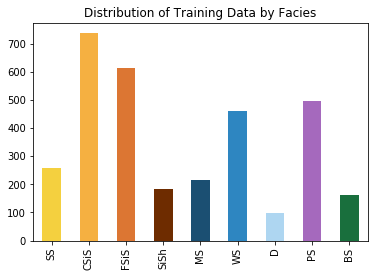

SS      259
CSiS    738
FSiS    615
SiSh    184
MS      217
WS      462
D        98
PS      498
BS      161
Name: Facies, dtype: int64

In [7]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
facies_counts = data['Facies'].value_counts().sort_index()
#use facies labels to index each count
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels_unique = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']
facies_counts.index = facies_labels_unique

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
plt.show()
facies_counts

This shows the distribution of examples by facies for the 3232 training examples in the training set.  Dolomite (facies 7) has the fewest with 98 examples.  There are also only 161 bafflestone examples.  Depending on the performance of the classifier we are going to train, we may consider getting more examples of these facies.

Let us take a look at the well log measurements and the lithofacies from the well 'SHRIMPLIN'.

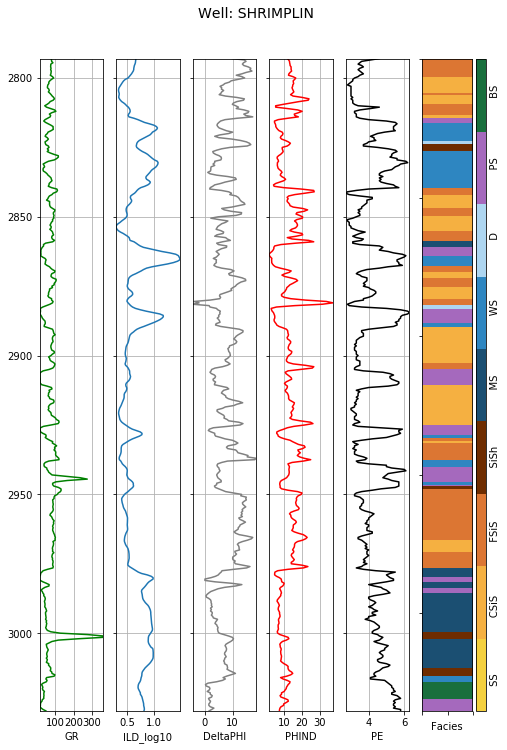

In [8]:
make_facies_log_plot(data[data['Well Name'] == 'SHRIMPLIN'], facies_colors)
plt.show()

<font color = red>**Task 2:**</font> Creat a similar plot that shows the well log measurements and the facies from well 'NEWBY'. <font color = red>**(5 points)**</font>

# 4 Split data into training and test set
We will remove one well from the data that we just explored above, for the purpose of testing the performance of our classifier. The next line of code removes the data from well '<font color = red>**SHANKLE**</font>' and put it aside for testing purpose. That is, after we finish training our classifier and fine-tuning all the hyperparameters, we will use this set of data to test our support vector machine classifier.

In [9]:
test_data = data[data['Well Name'] == 'SHANKLE']

We will use all the other remaining data as our training and cross-valiation data.

In [10]:
training_data = data[data['Well Name']!='SHANKLE']

Remember that our training data set consists of two parts: feature vectors and labels. We now need to separate them.

In [11]:
features = ['GR','ILD_log10','DeltaPHI','PHIND','PE','NM_M','RELPOS']
input_feature_vectors = training_data[features]  # feature vectors in the training data set
output_facies_labels = training_data['Facies']   # labels in the training data set

Crossplots are a familiar tool in the geosciences to visualize how two properties vary with rock type.  This dataset contains 5 log variables, and scatter matrix can help to quickly visualize the variation between the all the variables in the dataset.  We can employ the very useful [Seaborn library](https://stanford.edu/~mwaskom/software/seaborn/) to quickly create a nice looking scatter matrix. Each panel in the plot shows the relationship between two of the variables on the x and y axis, with a stacked bar plot showing the distribution of each type of measurement along the diagonal. 

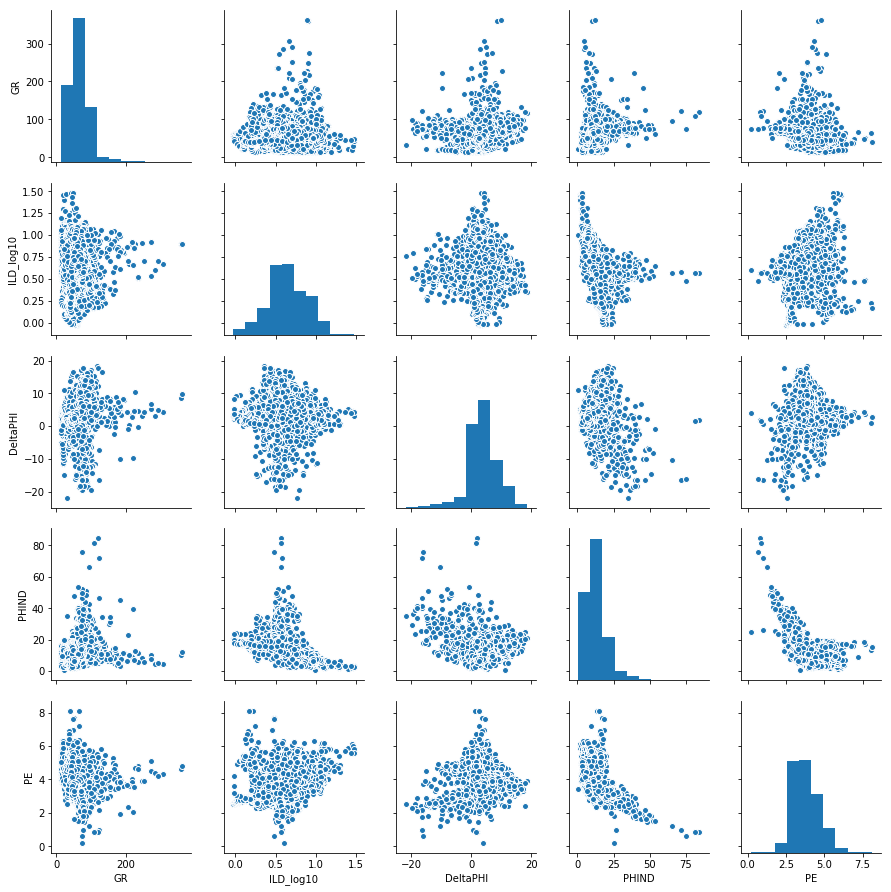

In [12]:
sns.pairplot(input_feature_vectors[['GR','ILD_log10','DeltaPHI','PHIND','PE']])
plt.show()

It is not clear from these crossplots what relationships exist between the measurements and facies labels. This is where machine learning will prove useful. 

# 5. Preprocessing data
Many machine-learning algorithms assume the feature data are normally distributed (i.e., Gaussian with zero mean and unit
variance). The above figure shows us that this is not the case with our training data. We will condition, or standardize, the training data so that it has this property. The same factors used to standardize the training set must be applied to any subsequent data set that will be classified. Scikit-learn includes a handy StandardScalar class that can be applied to the training set and later used to standardize any input data. <br>

Recall that you already implemented the scaling, or standardizing, procedure in the **lab exercise** on <font color=red>**logistic regression**</font>. 

<font color = red>**Task 3:**</font> Import <font color=blue>**StandardScaler**</font> from **Scikit-learn**. <font color = red>**(10 points)**</font>

**HINT**: If you forget how to do it, please refer back to your lab exercise on logitic regression.

<font color = red>**Task 4:**</font> Perform scaling using the imported <font color=blue>**StandardScaler**</font>, and assign the final scaled data to a new variable <font color=blue>**scaled_features**</font>. <font color = red>**(15 points)**</font>

**HINT**: If you forget how to do it, please refer back to your lab exercise on logitic regression. Remember that we are only scaling the input feature vectors (i.e., input_feature_vectors), NOT the labels.

Next, let us create a new variable **X_train** for the input variables (i.e., feature vectors) from the training data. Similarly, we will also create a new varaible **y_train** for the output variables (i.e., our labels).

In [ ]:
X_train = scaled_features
y_train = output_facies_labels

# 6. Train a SVM classifier
Now, we are ready to train a SVM classifier. 

<font color = red>**Task 5:**</font> Import support vector machine classifier from Scikit-learn. <font color = red>**(10 points)**</font>

**HINT**: If you forget how to do it, please refer back to my lecture slides (the last page), or the example notebook in this folder: SVM_Example2_Moon.ipynb

<font color = red>**Task 6**</font>: Assign the SVC method to a new variable <font color=blue>*svm_clf*</font>. <font color = red>**(10 points)**</font> 

**HINT**: Please refer back to SVM_Example2_Moon.ipynb. Note that, in SVM_Example2_Moon.ipynb, I set kernel = 'poly', degree = 3, coef0 = 1, C = 5. However, for this task, please use the folowing hyperparameters: **kernel = 'rbf', C = 10, gamma = 1** instead.

<font color = red>**Task 7:**</font> Train a SVM classifier using our training data, i.e., <font color=blue>**X_train**</font> and <font color=blue>**y_train**</font>. <font color = red> **(10 points)**</font>

**HINT:** Again, if you do not know how to do it, please take a look at SVM_Example2_Moon.ipynb. Only one line of code is necessary for this task.

Congratulations! You just trained your first SVM classifier! <br>

# 7. Make predictions on test data
Now, let us test this classifer on the test data set. First, we need to get the test data ready.

In [ ]:
y_test = test_data['Facies'] # This is the true labels (i.e., true answeres) from the test well.
test_well_features = test_data.drop(['Facies','Formation','Well Name','Depth'], axis = 1)
X_test = scaler.transform(test_well_features) # This is the data on which we are going to make predictions using the SVM classifier that you just trained.

<font color = red>**Task 8:**</font> Make predictions on test data, and assign the predictions to a new variable <font color=blue>*y_pred*</font>. <font color = red> **(10 points)**</font>

**HINT:** To make predicions, all you need to do is something like <font color=blue>*name_of_classifier.predict(test_data)*</font>.

# 8. Evaluation

Because we know the true facies labels in the test data set, we can use these true labels to evaluate how good our predictions are.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=facies_labels_unique))

Your results should look very similar to the following:
<img src = 'ClassificationReport.PNG'>

Remember that, precision and recall are metrics that tell us how the classifier is performing for individual facies. Precision is the probability that, given a classification result for a sample, the sample actually belongs to that class. Recall is the probability that a sample will be correctly classified for a given class. For example, if the classifier predicts that an interval is fine siltstone (FSiS), there is a 64% probability that the interval is actually fine siltstone (precision). If an interval is actually fine siltstone, there is a 55% probability that it will be correctly classified (recall). The F1 score combines both accuracy and precision to give a single measure of relevancy of the classifier results.

<font color = red>**Task 9:**</font> Interpret the precision and recall scores for CSiS. <font color = red> **(10 points)**</font>


Now, let us plot up the predictions in the log-plot form and compare them with the ground truth

In [ ]:
from faciesplot import compare_facies_plot  # import the plotting codes

In [ ]:
test_data['Prediction'] = y_pred
compare_facies_plot(test_data, 'Prediction',facies_colors)
plt.show()

Excellent!

# 9. Applications to SVM to geoscience

<font color = red>**Task 10:**</font> Do a literature search and look for at least one example where SVM is used to solve some geoscience-related problems. Then, report the source of the information (e.g., URL, DOI, etc.), and summarize the example using a few sentences. <font color = red> **(5 points)**</font>

In [ ]:
(answer to Task 10:)


# Bonus
In the above example, our prediction precision is 0.49, recall is 0.46, and F1 score is 0.44. Try to improve the prediction. <font color = red> **(10 points)**</font>  <br>
<br>
For example, in the above example, I asked you to use the following parameters: kernel = 'rbf', C = 10, gamma = 1, when setting up the suppoert vector machine classiifer. Please feel free to try other parameter settings.

(answer to Bonus)


## References

1\. Amato del Monte, A., 2015. Seismic Petrophysics: Part 1, *The Leading Edge*, 34 (4). [doi:10.1190/tle34040440.1](http://dx.doi.org/10.1190/tle34040440.1)

2\. Bohling, G. C., and M. K. Dubois, 2003. An Integrated Application of Neural Network and Markov Chain Techniques to Prediction of Lithofacies from Well Logs, *KGS Open-File Report* 2003-50, 6 pp. [pdf](http://www.kgs.ku.edu/PRS/publication/2003/ofr2003-50.pdf)

3\.Dubois, M. K., G. C. Bohling, and S. Chakrabarti, 2007, Comparison of four approaches to a rock facies classification problem, *Computers & Geosciences*, 33 (5), 599-617 pp. [doi:10.1016/j.cageo.2006.08.011](http://dx.doi.org/10.1016/j.cageo.2006.08.011)

4\. Hall, B., 2016, Facies Classification Using Machine Learning, The Leading Edge, 35(10). [doi:10.1190/tle35100906.1](http://dx.doi.org/10.1190/tle35100906.1)